# Analíticas Alertas de Episodios y Normativas

---

# Ejemplo específico para Dióxido de Azufre

### **DECRETO 104: NORMA PRIMARIA DE CALIDAD DE AIRE PARA DIÓXIDO DE AZUFRE (SO2)**  

**Artículo completo:** https://www.bcn.cl/leychile/navegar?idNorma=1131641&idParte=
  
**TÍTULO II: Normas de Calidad Primaria para Dióxido de Azufre**  

**Artículo 3.** La norma primaria de calidad de aire para dióxido de azufre como concentración anual será de 60 µg/m3N, equivalente a 23 ppbv.  

**Artículo 4.** La norma primaria de calidad de aire para dióxido de azufre como concentración de 24 horas será de 150 µg/m3N, equivalente a 57 ppbv.  
  
**Para nuestro ejemplo actual:**  
**Artículo 5.** La norma primaria de calidad de aire para dióxido de azufre como concentración de 1 hora será de 350 µg/m3N, equivalente a 134 ppbv.  
  
Se considerará sobrepasada la norma primaria de calidad de aire para dióxido de azufre como concentración de 1 hora, cuando ocurra al menos, una de las siguientes condiciones:  
  
**a.** (No tenemos 3 años de datos)  
**b.** Si en un año calendario, el valor correspondiente al percentil 98,5 de las concentraciones de 1 hora registradas, fuere mayor o igual al doble del valor de la norma que se establece. A partir del cuarto año calendario de publicada la norma en el Diario Oficial, se considera un percentil 99 para evaluar esta condición.  
  
**TÍTULO III: Niveles de Emergencia Ambiental de Dióxido de Azufre**  
**Artículo 8.** Los siguientes niveles originarán situaciones de emergencia ambiental para dióxido de azufre, expresados como concentración de 1 hora:  
  
![Descripción de la imagen](nivelesEmergencia_SO2.png)

Según lo anterior, deberían existir dos tipos de alertas en la plataforma:  
* **Alertas de Episodio**: Notifica los niveles de **Alerta/Preemergencia/Emergencia** de cierto regulado cuando supera la concentración horaria establecida
* **Alertas Normativas**: Notifica (en este caso) la cantidad de horas en el año calendario en curso que cierto regulado lleva superando la norma y advierte cantidad de horas restantes en la "cuenta de ahorro" anual (caracter predictivo)

* **UfId**: 1631
* **Nombre**: TERMINAL MARITIMO GNL - QUINTERO 
* **Ubicacióń**: Región de Valparaíso
* **ProcesoId**: 82
* **DispositivoId**: 381

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

**Parámetros a utilizar:**

In [2]:
ufId  = 1631
agno  = 2022   # debería ser el año en curso
# param = "SO2"

In [3]:
# se importa el dataset
df = pd.read_csv('df_CA_' + str(ufId) + '.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis = 1)

/tmp/ipykernel_23457/1859463002.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_CA_' + str(ufId) + '.csv')


In [4]:
df.head()

,DeviceId,UfId,ProcesoId,Sistema,IdVerificacion,DispositivoId,Nombre,Valor,Unidad,Crudo,Calibraciones,Validados,timestamp,timestampUTC,estampaTiempo
0,ApiRest_U1631P82,1631,82,ApiRest,0e14d5cf-ed19-40ea-b2c8-0087f0a550b2,383,O3,16.01,ppb,NaN,NaN,DV,2021-09-09 16:38:00,2021-09-09 16:44:26,2021-09-09 16:38:00
1,ApiRest_U1631P82,1631,82,ApiRest,fe0b3e23-453d-4179-acaa-eacb3da7d433,383,O3,16.51,ppb,NaN,NaN,DV,2021-09-09 16:32:00,2021-09-09 16:38:23,2021-09-09 16:32:00
2,ApiRest_U1631P82,1631,82,ApiRest,fa698414-a6ae-4537-857d-00edea65c619,383,O3,16.36,ppb,NaN,NaN,DV,2021-09-09 16:41:00,2021-09-09 16:47:06,2021-09-09 16:41:00
3,ApiRest_U1631P82,1631,82,ApiRest,ba93fa54-3eb3-46cc-a8d1-2f4975221573,383,O3,16.73,ppb,NaN,NaN,DV,2021-09-09 16:40:00,2021-09-09 16:46:07,2021-09-09 16:40:00
4,ApiRest_U1631P82,1631,82,ApiRest,ff0339c5-595e-4086-a9cf-2c8b0619e5e9,383,O3,15.97,ppb,NaN,NaN,DV,2021-09-09 16:39:00,2021-09-09 16:45:15,2021-09-09 16:39:00


---

### Limpieza de Datos

En general, para la limpieza inicial:
* Se utilizan sólo **datos validados** (columna Validados, DV)
* Para el tiempo sólo se utiliza la columna **estampaTiempo** que debería ser igual **timestamp** si el dato está validado

In [5]:
print('Datos Validados', df['Validados'].unique())

Datos Validados ['DV']


In [6]:
print("Lista de Parámetros")
print(df['Nombre'].unique())

Lista de Parámetros
['O3' 'DIRV' 'NOX' 'NO' 'NO2' 'PM10' 'SO2' 'CO' 'VELV' 'PM25' 'HCT' 'CH4'
 'NMHC']


In [7]:
df = df.drop(['Calibraciones', 'Crudo'], axis = 1)    # no necesitamos datos calibrados ni crudos
df = df.drop(['timestamp', 'timestampUTC'], axis = 1) # de momento, no necesitamos estas columnas de fechas
# nivelesEmergencia_SO2
# se ordena por fecha de forma ascendente
df = df.rename(columns = {"estampaTiempo": "eTiempo"})

df['estampaTiempo'] = pd.to_datetime(df['eTiempo'], dayfirst = True)
df = df.drop(['eTiempo'], axis = 1)
df = df.sort_values(by = 'estampaTiempo', ascending = True)

df['year'] = pd.DatetimeIndex(df['estampaTiempo']).year # se crea columna year para filtrar el año deseado

dfSet2022 = df[df['year'] == agno] # seleccionamos el año 2022

In [8]:
print("Cantidad de registros año 2022:", dfSet2022.shape[0])

Cantidad de registros año 2022: 2594374


**Elección de parámetro**

In [9]:
param = "SO2"

df_2022_SO2 = dfSet2022[dfSet2022['Nombre'] == param]  # seleccionamos el Dióxido de Azufre
df_2022_SO2 = df_2022_SO2.reset_index(drop = True)

**Verificación de unicidad:**

In [10]:
print('Año:', df_2022_SO2['year'].unique())
print('ProcesoId:', df_2022_SO2['ProcesoId'].unique())
print('DispositivoId:', df_2022_SO2['DispositivoId'].unique())
print('Nombre:', df_2022_SO2['Nombre'].unique())
print('Unidad:', df_2022_SO2['Unidad'].unique())

Año: [2022]
ProcesoId: [82]
DispositivoId: [381]
Nombre: ['SO2']
Unidad: ['ppb']


**Conversión de unidades:**

In [11]:
df_2022_SO2 = df_2022_SO2.rename(columns = {"Valor": "valor", "Unidad": 'unidad'})

df_2022_SO2['Valor'] = round(df_2022_SO2['valor'] * 2.62, 3)
df_2022_SO2 = df_2022_SO2.assign(Unidad = "ug/m3")

df_2022_SO2 = df_2022_SO2.drop(['valor', 'unidad'], axis = 1)

**Borrar columnas innecesarias:**

In [12]:
df_2022_SO2 = df_2022_SO2.drop(['DeviceId', 'UfId', 'ProcesoId', 'Sistema', 'IdVerificacion',
                                'DispositivoId', 'Validados', 'year'], axis = 1)

**Dataset final:**

In [13]:
df_2022_SO2

,Nombre,estampaTiempo,Valor,Unidad
0,SO2,2022-01-01 00:00:00,10.857,ug/m3
1,SO2,2022-01-01 00:00:00,11.224,ug/m3
2,SO2,2022-01-01 00:01:00,10.404,ug/m3
3,SO2,2022-01-01 00:02:00,10.477,ug/m3
4,SO2,2022-01-01 00:03:00,11.022,ug/m3
...,...,...,...,...
199355,SO2,2022-05-18 03:59:00,28.060,ug/m3
199356,SO2,2022-05-18 04:00:00,26.855,ug/m3
199357,SO2,2022-05-18 04:01:00,25.388,ug/m3
199358,SO2,2022-05-18 04:02:00,25.257,ug/m3


In [14]:
df_2022_SO2.dtypes

Nombre                   object
estampaTiempo    datetime64[ns]
Valor                   float64
Unidad                   object
dtype: object

---

### Eliminación de NAN y duplicados

In [15]:
df_2022_SO2.isna().sum()

Nombre           0
estampaTiempo    0
Valor            0
Unidad           0
dtype: int64

In [16]:
df_2022_SO2.duplicated().sum()

25

In [17]:
df_2022_SO2.drop_duplicates()

,Nombre,estampaTiempo,Valor,Unidad
0,SO2,2022-01-01 00:00:00,10.857,ug/m3
1,SO2,2022-01-01 00:00:00,11.224,ug/m3
2,SO2,2022-01-01 00:01:00,10.404,ug/m3
3,SO2,2022-01-01 00:02:00,10.477,ug/m3
4,SO2,2022-01-01 00:03:00,11.022,ug/m3
...,...,...,...,...
199355,SO2,2022-05-18 03:59:00,28.060,ug/m3
199356,SO2,2022-05-18 04:00:00,26.855,ug/m3
199357,SO2,2022-05-18 04:01:00,25.388,ug/m3
199358,SO2,2022-05-18 04:02:00,25.257,ug/m3


Este sería el dataset final.

---

### Procesamiento de Datos

**Resample a datos horarios:**

In [18]:
df_2022_SO2_re = df_2022_SO2.resample('3600s', on = 'estampaTiempo').mean().ffill()
df_2022_SO2_re = df_2022_SO2_re.reset_index()
df_2022_SO2_re = df_2022_SO2_re.assign(Nombre = "SO2", Unidad = "ug/m3")
df_2022_SO2_re = df_2022_SO2_re[['Nombre', 'estampaTiempo', 'Valor', 'Unidad']]
df_2022_SO2_re

/tmp/ipykernel_23457/436158796.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022_SO2_re = df_2022_SO2.resample('3600s', on = 'estampaTiempo').mean().ffill()


,Nombre,estampaTiempo,Valor,Unidad
0,SO2,2022-01-01 00:00:00,11.136656,ug/m3
1,SO2,2022-01-01 01:00:00,11.267459,ug/m3
2,SO2,2022-01-01 02:00:00,11.955131,ug/m3
3,SO2,2022-01-01 03:00:00,11.488623,ug/m3
4,SO2,2022-01-01 04:00:00,11.808770,ug/m3
...,...,...,...,...
3288,SO2,2022-05-18 00:00:00,11.913689,ug/m3
3289,SO2,2022-05-18 01:00:00,14.129180,ug/m3
3290,SO2,2022-05-18 02:00:00,16.297918,ug/m3
3291,SO2,2022-05-18 03:00:00,24.049869,ug/m3


Dado que el ejemplo actual no inclumple las normativas generales, haremos una amplificación de los datos.

In [19]:
df_2022_SO2_re['Valor'] = df_2022_SO2_re['Valor'] * 5.3
df_2022_SO2_re

,Nombre,estampaTiempo,Valor,Unidad
0,SO2,2022-01-01 00:00:00,59.024275,ug/m3
1,SO2,2022-01-01 01:00:00,59.717533,ug/m3
2,SO2,2022-01-01 02:00:00,63.362195,ug/m3
3,SO2,2022-01-01 03:00:00,60.889702,ug/m3
4,SO2,2022-01-01 04:00:00,62.586484,ug/m3
...,...,...,...,...
3288,SO2,2022-05-18 00:00:00,63.142549,ug/m3
3289,SO2,2022-05-18 01:00:00,74.884656,ug/m3
3290,SO2,2022-05-18 02:00:00,86.378966,ug/m3
3291,SO2,2022-05-18 03:00:00,127.464305,ug/m3


**Percentil 98.5:**

In [20]:
df_2022_SO2_re = df_2022_SO2_re.assign(perc98_5 = 0)

for index in range(0, df_2022_SO2_re.shape[0]):
    tmpdf = df_2022_SO2_re.loc[0:index]
    tmpPerc = tmpdf['Valor'].tolist()
    valPerc98_5 = round(np.percentile(tmpPerc, 98.5), 3)
    df_2022_SO2_re.loc[index, 'perc98_5'] = valPerc98_5

In [21]:
df_2022_SO2_re

,Nombre,estampaTiempo,Valor,Unidad,perc98_5
0,SO2,2022-01-01 00:00:00,59.024275,ug/m3,59.024
1,SO2,2022-01-01 01:00:00,59.717533,ug/m3,59.707
2,SO2,2022-01-01 02:00:00,63.362195,ug/m3,63.253
3,SO2,2022-01-01 03:00:00,60.889702,ug/m3,63.251
4,SO2,2022-01-01 04:00:00,62.586484,ug/m3,63.316
...,...,...,...,...,...
3288,SO2,2022-05-18 00:00:00,63.142549,ug/m3,705.582
3289,SO2,2022-05-18 01:00:00,74.884656,ug/m3,705.508
3290,SO2,2022-05-18 02:00:00,86.378966,ug/m3,705.434
3291,SO2,2022-05-18 03:00:00,127.464305,ug/m3,705.360


Al dataset anterior le agregamos las columnas **alerta, preEmer, emerg, norma, alertaGral** donde se les asigna 1 si supera el umbral y 0 si no lo supera.

In [22]:
df_2022_SO2_re = df_2022_SO2_re.assign(alerta = 0, preEmer = 0, emerg = 0, norma = 0, alertaGral = 0)

df_2022_SO2_re['alerta']     = np.where((df_2022_SO2_re['Valor'] >= 500) & (df_2022_SO2_re['Valor'] < 650), 1, df_2022_SO2_re['alerta'])
df_2022_SO2_re['preEmer']    = np.where((df_2022_SO2_re['Valor'] >= 650) & (df_2022_SO2_re['Valor'] < 950), 1, df_2022_SO2_re['preEmer'])
df_2022_SO2_re['emerg']      = np.where(df_2022_SO2_re['Valor'] > 950, 1, df_2022_SO2_re['emerg'])
df_2022_SO2_re['norma']      = np.where(df_2022_SO2_re['perc98_5'] >= 700, 1, df_2022_SO2_re['norma'])

df_2022_SO2_re['alertaGral'] = np.where(df_2022_SO2_re['Valor'] >= 500, 1, df_2022_SO2_re['alertaGral'])


In [23]:
df_2022_SO2_re

,Nombre,estampaTiempo,Valor,Unidad,perc98_5,alerta,preEmer,emerg,norma,alertaGral
0,SO2,2022-01-01 00:00:00,59.024275,ug/m3,59.024,0,0,0,0,0
1,SO2,2022-01-01 01:00:00,59.717533,ug/m3,59.707,0,0,0,0,0
2,SO2,2022-01-01 02:00:00,63.362195,ug/m3,63.253,0,0,0,0,0
3,SO2,2022-01-01 03:00:00,60.889702,ug/m3,63.251,0,0,0,0,0
4,SO2,2022-01-01 04:00:00,62.586484,ug/m3,63.316,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3288,SO2,2022-05-18 00:00:00,63.142549,ug/m3,705.582,0,0,0,1,0
3289,SO2,2022-05-18 01:00:00,74.884656,ug/m3,705.508,0,0,0,1,0
3290,SO2,2022-05-18 02:00:00,86.378966,ug/m3,705.434,0,0,0,1,0
3291,SO2,2022-05-18 03:00:00,127.464305,ug/m3,705.360,0,0,0,1,0


---

## Algunas analíticas:

### "Cuenta de Ahorro"

- **Caso Horario:**

**Cantidad de horas al año:**

In [24]:
nHrsAnuales = 24 * 365
nHrsAnuales

8760

**Percentil 98.5 de el total de horas anuales:**

In [25]:
p98_5_nHrsAnuales = (nHrsAnuales * 98.5) / 100
p98_5_nHrsAnuales

8628.6

In [26]:
p98_5_nHrsAnuales = int(round(p98_5_nHrsAnuales, 0))
p98_5_nHrsAnuales

8629

<p style="text-align: center;">cuenta de ahorro = total de horas anuales - percentil 98.5 del total</p>

In [27]:
ctaAhorro = nHrsAnuales - p98_5_nHrsAnuales
ctaAhorro

131

Para el caso específico del SO2 para la Norma Primaria Horaria, los regulados sólo pueden superar la norma (700 µg/m3N) durante 131 horas al año.

In [28]:
df_2022_SO2_re = df_2022_SO2_re.assign(counter = 0)

df_2022_SO2_re['counter'] = df_2022_SO2_re['norma'].cumsum()

In [29]:
df_2022_SO2_re

,Nombre,estampaTiempo,Valor,Unidad,perc98_5,alerta,preEmer,emerg,norma,alertaGral,counter
0,SO2,2022-01-01 00:00:00,59.024275,ug/m3,59.024,0,0,0,0,0,0
1,SO2,2022-01-01 01:00:00,59.717533,ug/m3,59.707,0,0,0,0,0,0
2,SO2,2022-01-01 02:00:00,63.362195,ug/m3,63.253,0,0,0,0,0,0
3,SO2,2022-01-01 03:00:00,60.889702,ug/m3,63.251,0,0,0,0,0,0
4,SO2,2022-01-01 04:00:00,62.586484,ug/m3,63.316,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3288,SO2,2022-05-18 00:00:00,63.142549,ug/m3,705.582,0,0,0,1,0,302
3289,SO2,2022-05-18 01:00:00,74.884656,ug/m3,705.508,0,0,0,1,0,303
3290,SO2,2022-05-18 02:00:00,86.378966,ug/m3,705.434,0,0,0,1,0,304
3291,SO2,2022-05-18 03:00:00,127.464305,ug/m3,705.360,0,0,0,1,0,305


Este debería ser el dataset ingresado a la plataforma.

In [30]:
# df_2022_SO2_re.to_csv('exampleSO2.csv')

### Porcentaje de superación de la norma en cada caso:

In [30]:
print('alerta')
print(df_2022_SO2_re['alerta'].value_counts('%'))
print()
print('preEmer')
print(df_2022_SO2_re['preEmer'].value_counts('%'))
print()
print('emerg')
print(df_2022_SO2_re['emerg'].value_counts('%'))
print()
print('alertaGral')
print(df_2022_SO2_re['alertaGral'].value_counts('%'))
print()
print('norma')
print(df_2022_SO2_re['norma'].value_counts('%'))
print(df_2022_SO2_re['norma'].value_counts())

alerta
0    0.980261
1    0.019739
Name: alerta, dtype: float64

preEmer
0    0.98512
1    0.01488
Name: preEmer, dtype: float64

emerg
0    0.993623
1    0.006377
Name: emerg, dtype: float64

alertaGral
0    0.959004
1    0.040996
Name: alertaGral, dtype: float64

norma
0    0.907076
1    0.092924
Name: norma, dtype: float64
0    2987
1     306
Name: norma, dtype: int64


---

## Gráficas

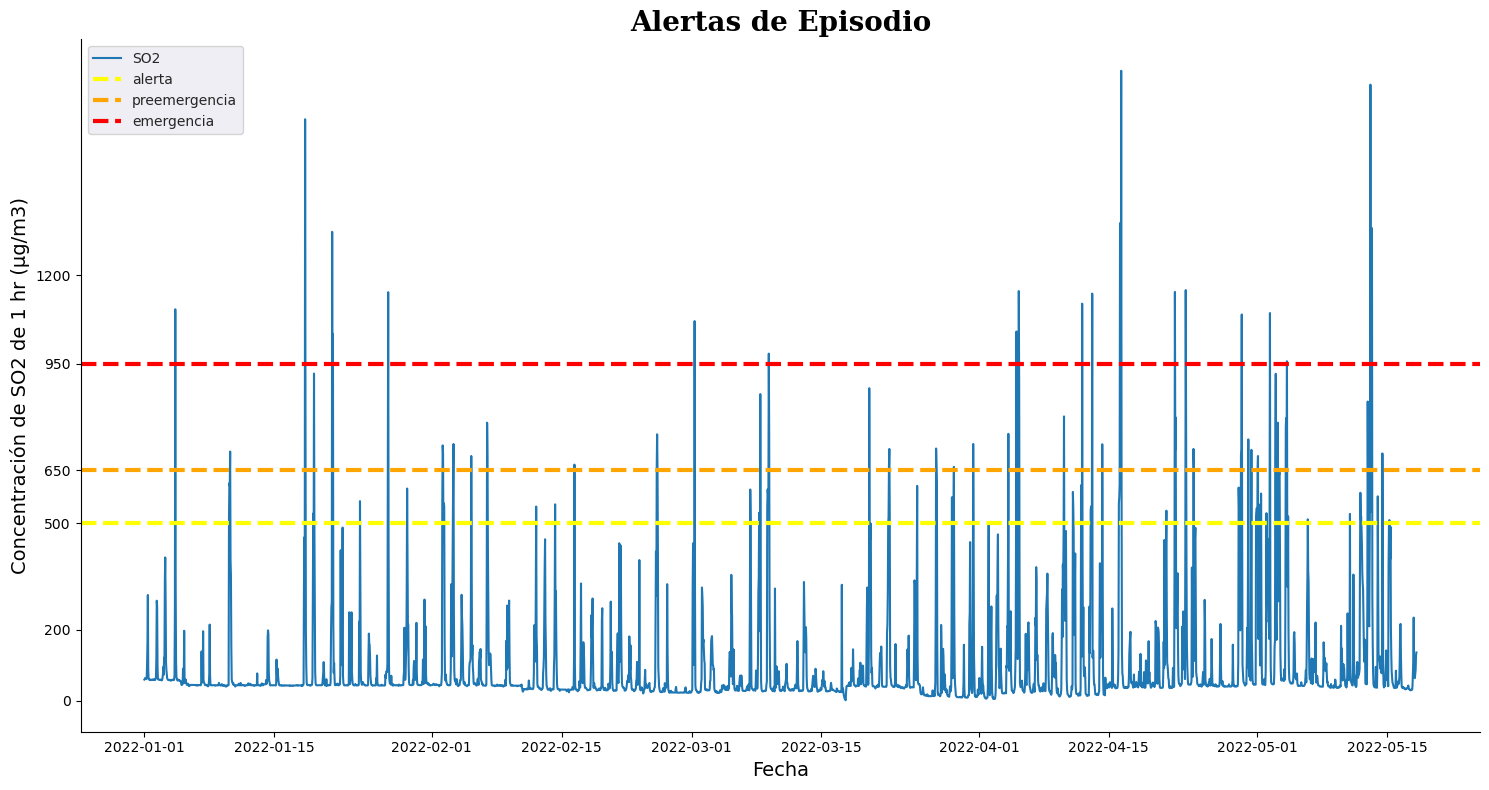

In [31]:
plt.figure(figsize = (15, 8))

ax = sns.lineplot(data = df_2022_SO2_re, x = 'estampaTiempo', y = 'Valor', label = "SO2")
sns.set_style('darkgrid')

plt.axhline(y = 500, color = 'yellow', linestyle = '--', lw = 3, label = "alerta")
plt.axhline(y = 650, color = 'orange', linestyle = '--', lw = 3, label = "preemergencia")
plt.axhline(y = 950, color = 'red', linestyle = '--', lw = 3, label = "emergencia")

yticks = [0, 200, 500, 650, 950, 1200]
ax.set_yticks(yticks)

plt.xlabel('Fecha', fontsize = 14); 
plt.ylabel('Concentración de SO2 de 1 hr (μg/m3)', fontsize = 14);

plt.title("Alertas de Episodio", fontdict = {'family': 'serif', 
                                             'color' : 'black',
                                             'weight': 'bold',
                                             'size': 20})

plt.tight_layout()
sns.despine();
plt.legend();

In [58]:
x_alert = df_2022_SO2_re[df_2022_SO2_re['counter'] == 131]['estampaTiempo']
x_alert

3084   2022-05-09 12:00:00
Name: estampaTiempo, dtype: datetime64[ns]

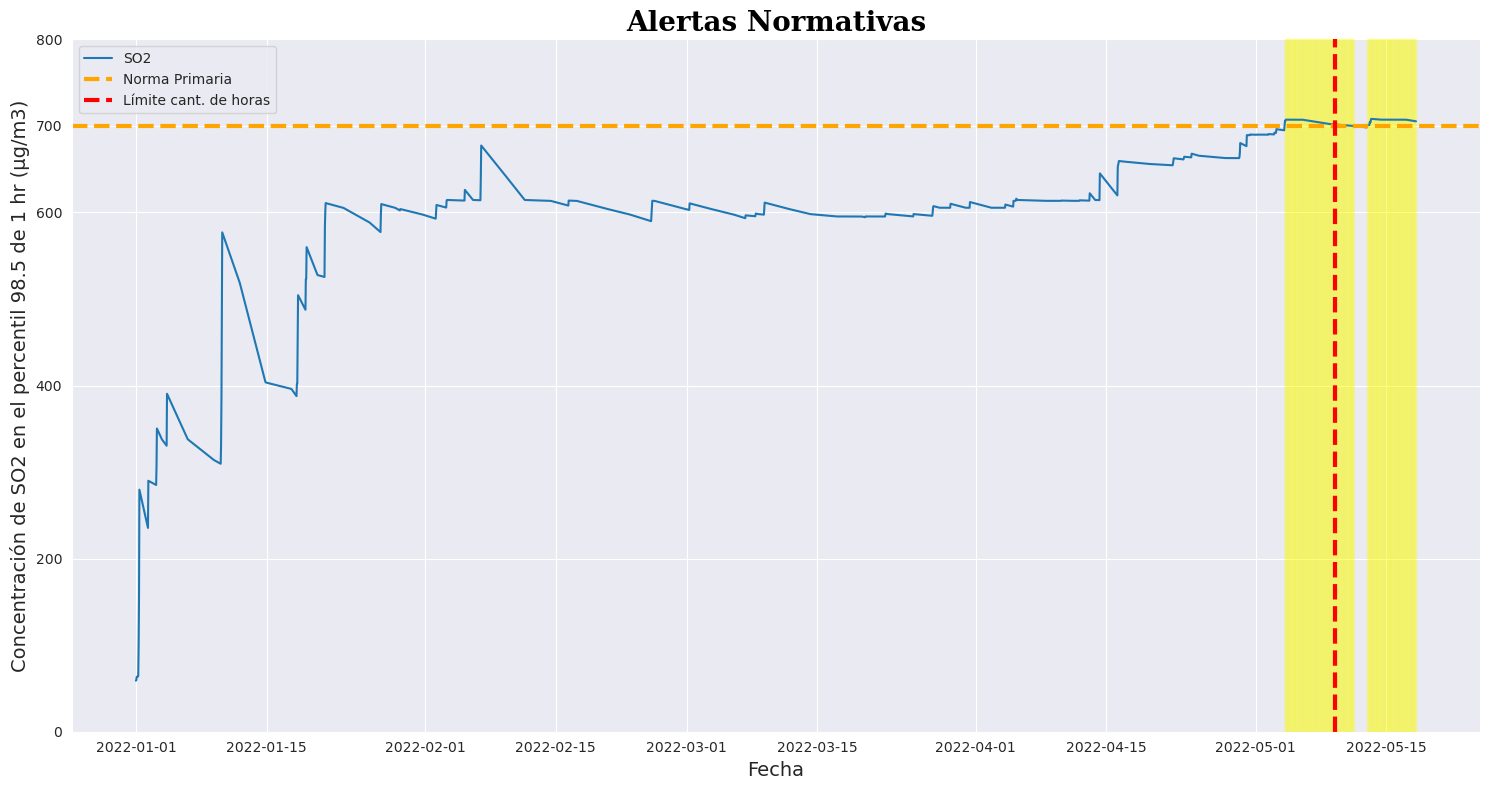

In [63]:
plt.figure(figsize = (15, 8))

# fechas (horas) en las cuales la norma se traspasa
dfNorma = df_2022_SO2_re[df_2022_SO2_re['norma'] == 1]

for x_i in dfNorma['estampaTiempo'].unique():
    plt.axvline(x = x_i, color = 'yellow', alpha = 0.2, linestyle = '-', lw = 1)

# fecha en la cual se cumplen las 131 hrs del Dióxido de Azufre
x_alert = df_2022_SO2_re[df_2022_SO2_re['counter'] == 131]['estampaTiempo'].unique()[0]
# plt.axvline(x = x_alert, color = 'orange', alpha = 1, linestyle = '--', lw = 3, label = "Límite cant. de horas")

ax = sns.lineplot(data = df_2022_SO2_re, x = 'estampaTiempo', y = 'perc98_5', label = "SO2")
# sns.set_style('darkgrid')

yticks = [0, 200, 400, 600, 700, 800]
ax.set_yticks(yticks)
plt.axhline(y = 700, color = 'orange', linestyle = '--', lw = 3, label = "Norma Primaria")
plt.axvline(x = x_alert, color = 'red', linestyle = '--', lw = 3, label = "Límite cant. de horas")

plt.xlabel('Fecha', fontsize = 14); 
plt.ylabel('Concentración de SO2 en el percentil 98.5 de 1 hr (μg/m3)', fontsize = 14);

plt.title("Alertas Normativas", fontdict = {'family': 'serif', 
                                             'color' : 'black',
                                             'weight': 'bold',
                                             'size': 20})

plt.tight_layout()
sns.despine();
plt.legend();

# *ideas para mostrar la información.*

* grafico de dos informaciones (color superior e inferior)
* grafico de doble eje horizontal
* grafico zoom cerca de la norma

---

## Propuesta de Arquitectura

![Descripción de la imagen](arquitectura_propuestaV2.png)

![Descripción de la imagen](workflow.png)